# Problem Statement :-
      Finance Industry is the biggest consumer of Data Scientists. It faces constant attack by fraudsters, 
      who try to trick the system. Correctly identifying fraudulent transactions is often compared with 
      finding needle in a haystack because of the low event rate. 
      It is important that credit card companies are able to recognize fraudulent credit card transactions 
      so that the customers are not charged for items that they did not purchase.
      You are required to try various techniques such as supervised models with oversampling,
      unsupervised anomaly detection, and heuristics to get good accuracy at fraud detection.




In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [2]:
data = pd.read_csv('train_data.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.shape

(227845, 31)

In [10]:
data.info

<bound method DataFrame.info of             Time        V1        V2        V3        V4        V5        V6  \
0        38355.0  1.043949  0.318555  1.045810  2.805989 -0.561113 -0.367956   
1        22555.0 -1.665159  0.808440  1.805627  1.903416 -0.821627  0.934790   
2         2431.0 -0.324096  0.601836  0.865329 -2.138000  0.294663 -1.251553   
3        86773.0 -0.258270  1.217501 -0.585348 -0.875347  1.222481 -0.311027   
4       127202.0  2.142162 -0.494988 -1.936511 -0.818288 -0.025213 -1.027245   
...          ...       ...       ...       ...       ...       ...       ...   
227840   62074.0 -1.993953  1.734986 -1.108037 -2.671817  1.605319  3.041992   
227841   32193.0 -0.440396  1.062920  1.582218 -0.029761  0.040967 -0.903627   
227842  163864.0  0.827820 -2.649344 -3.161235  0.209209 -0.561331 -1.570386   
227843  122571.0 -1.523903 -6.287060 -2.638246  1.330015 -1.672002  1.957509   
227844   43440.0 -1.608560  0.132746  2.075995 -1.937332 -1.822305 -0.429669   

       

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [12]:
data = data.sample(frac = 0.1 ,random_state = 1)

data.shape

(22784, 31)

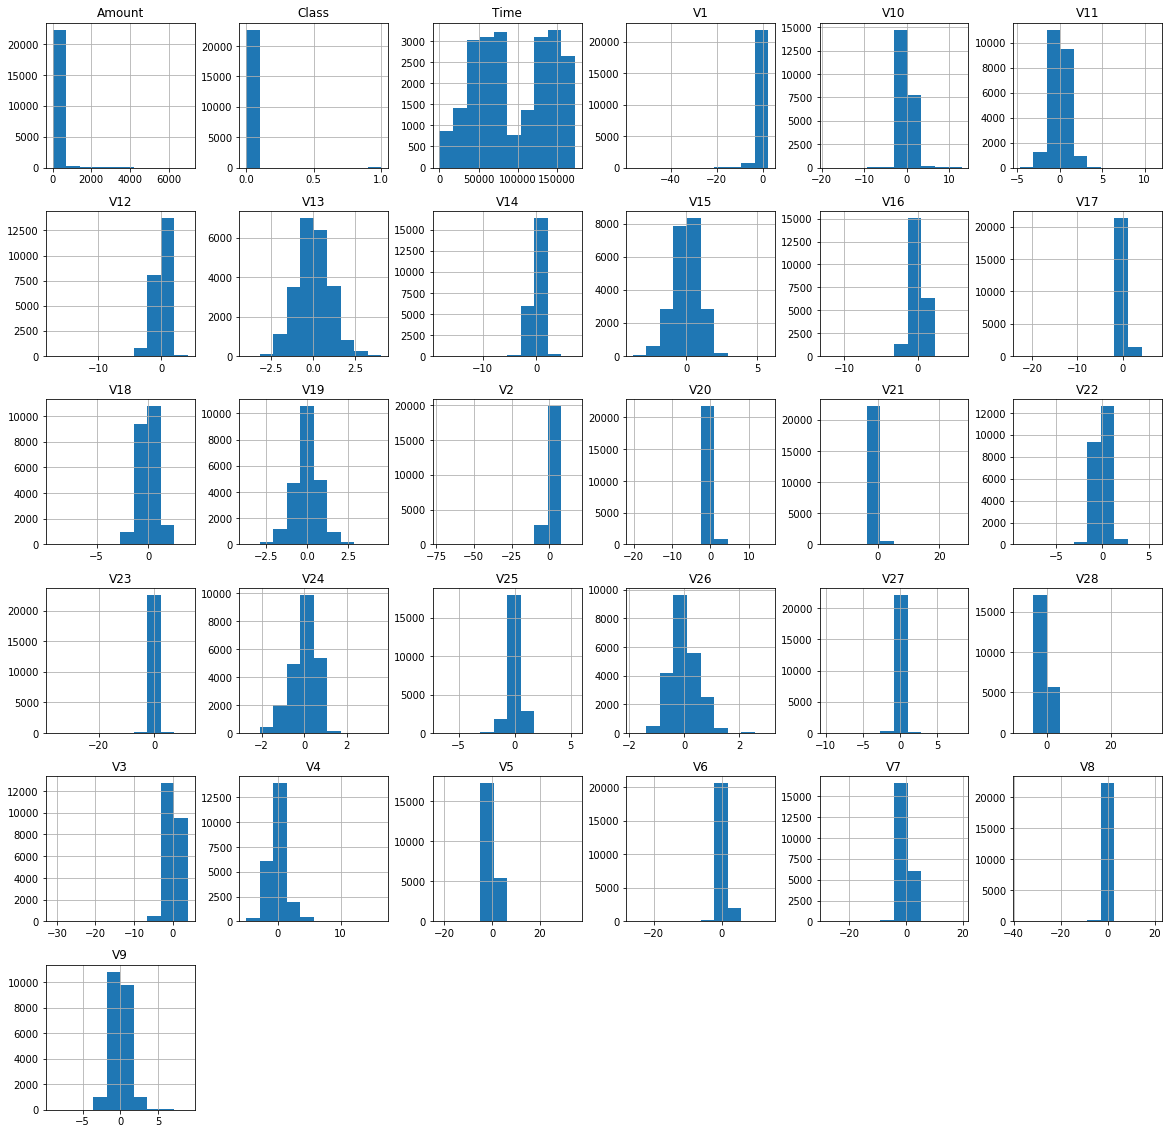

In [13]:
data.hist(figsize=(20,20))
plt.show()

## Exploratory Data Analysis

In [14]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

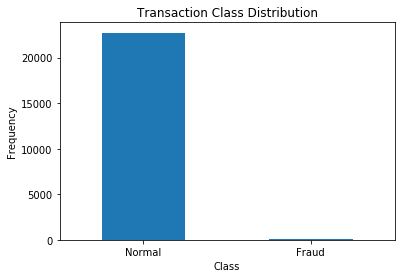

In [15]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [16]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [17]:
print(fraud.shape,normal.shape)

(47, 31) (22737, 31)


In [18]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     47.000000
mean     146.879574
std      211.130808
min        0.000000
25%        1.000000
50%       60.000000
75%      196.395000
max      829.410000
Name: Amount, dtype: float64

In [19]:
normal.Amount.describe()

count    22737.000000
mean        87.493923
std        238.614442
min          0.000000
25%          5.640000
50%         21.600000
75%         76.900000
max       6998.000000
Name: Amount, dtype: float64

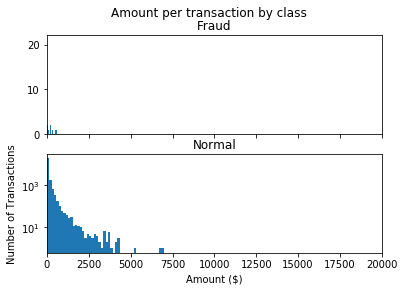

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

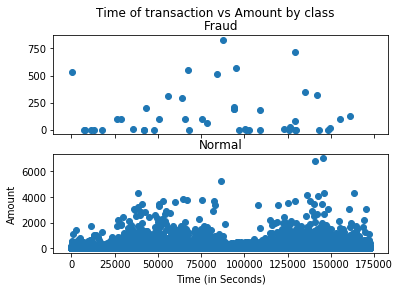

In [23]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [25]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data[data['Class']==1]

Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [26]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0020671152746624443
Fraud Cases : 47
Valid Cases : 22737


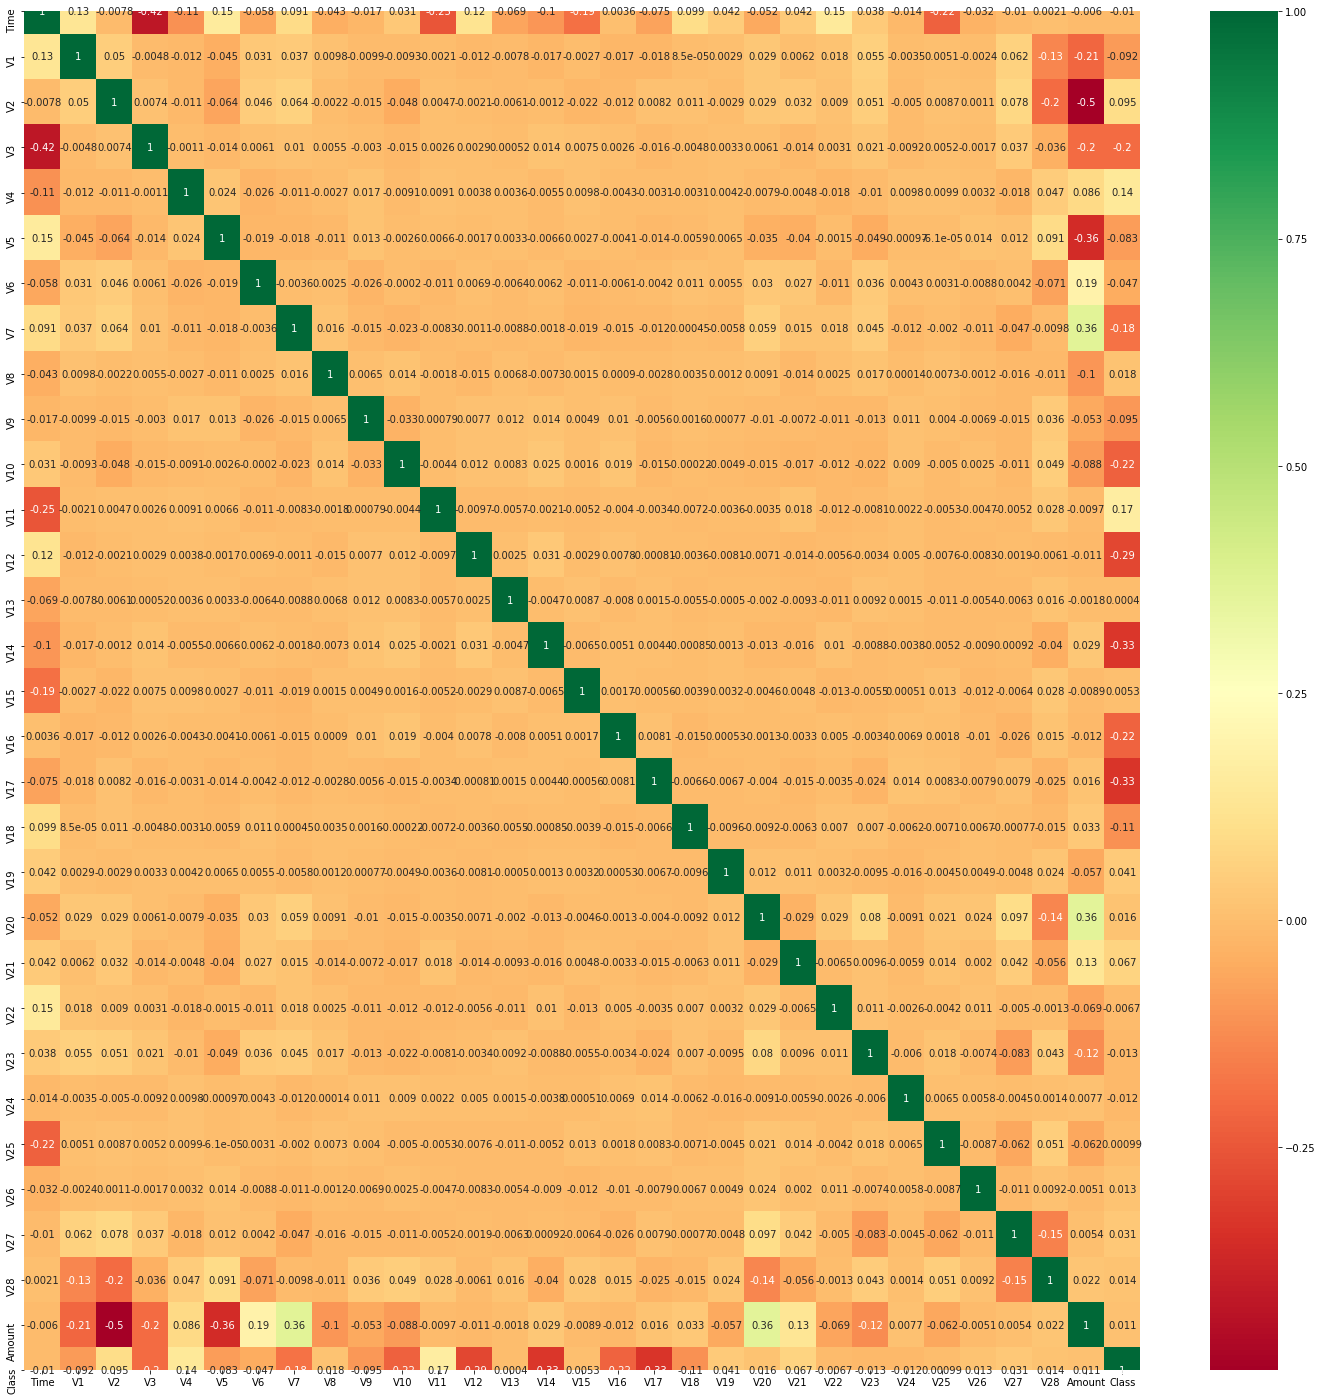

In [34]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(corrmat,vmax = .8 ,square = True)
plt.show()

In [35]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(22784, 30)
(22784,)


In [36]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}

In [37]:
type(classifiers)

dict

In [38]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 63
Accuracy Score :
0.9972349016853933
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22737
           1       0.33      0.34      0.34        47

    accuracy                           1.00     22784
   macro avg       0.67      0.67      0.67     22784
weighted avg       1.00      1.00      1.00     22784

Local Outlier Factor: 93
Accuracy Score :
0.9959181882022472
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22737
           1       0.02      0.02      0.02        47

    accuracy                           1.00     22784
   macro avg       0.51      0.51      0.51     22784
weighted avg       1.00      1.00      1.00     22784



/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


Support Vector Machine: 8851
Accuracy Score :
0.6115256320224719
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.61      0.76     22737
           1       0.00      0.43      0.00        47

    accuracy                           0.61     22784
   macro avg       0.50      0.52      0.38     22784
weighted avg       1.00      0.61      0.76     22784



#### Observations :
- Isolation Forest detected 63 errors versus Local Outlier Factor detecting 93 errors vs. SVM detecting 8851 errors
- Isolation Forest has a 99.72% more accurate than LOF of 99.59% and SVM of 61.15
- When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 37 % versus LOF detection rate of just 7 % and SVM of 0%.
- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases